# Tutorial bbMAGIC

In [19]:
import scanpy as sc
import pandas as pd
import bbmagic as bm

In [2]:
adata = sc.read("/home/mklein/FDA_project/data/Lx_Pancreatic_Cancer/batch_sm_matrix.h5ad")

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

adata.obs['dataset'] = 'none'
adata.obs['batch'] = adata.obs['dataset_2']
adata.obs['sample'] = adata.obs['well']
adata.layers['ctrl'] = adata.X

# sc.pp.filter_cells(adata, min_genes=250)
# sc.pp.filter_genes(adata, min_cells=600)
sc.pp.filter_cells(adata, min_genes=10)
sc.pp.filter_genes(adata, min_cells=200)

/home/mklein/miniconda3/envs/dropout_env/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


In [3]:
metadata = pd.read_csv('/home/mklein/FDA_project/data/Lx_Pancreatic_Cancer/metadata.csv')
metadata['sample'] = "S" + metadata['slide'].astype(str) + "_W" + metadata['well'].astype(str)
merge_df = pd.merge(adata.obs, metadata[['sample', 'condition']], how="inner", on="sample")
merge_df.index = adata.obs_names
adata.obs = merge_df

/home/mklein/miniconda3/envs/dropout_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mklein/miniconda3/envs/dropout_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


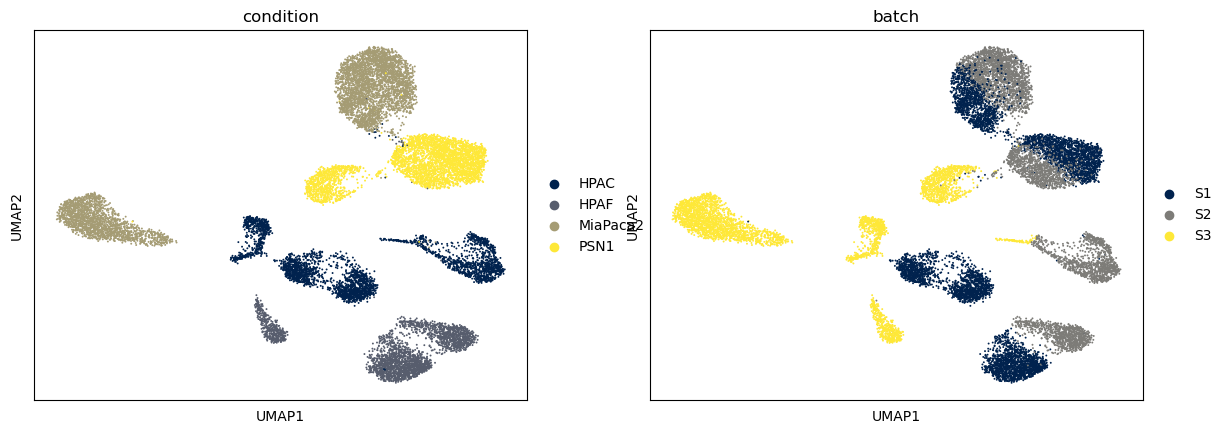

In [4]:
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors=50, metric='cosine')
sc.tl.umap(adata, min_dist=0.5, spread=1.0, random_state=1, n_components=2)
sc.pl.umap(adata, color=['condition', 'batch'], palette='cividis')

/home/mklein/miniconda3/envs/dropout_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mklein/miniconda3/envs/dropout_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


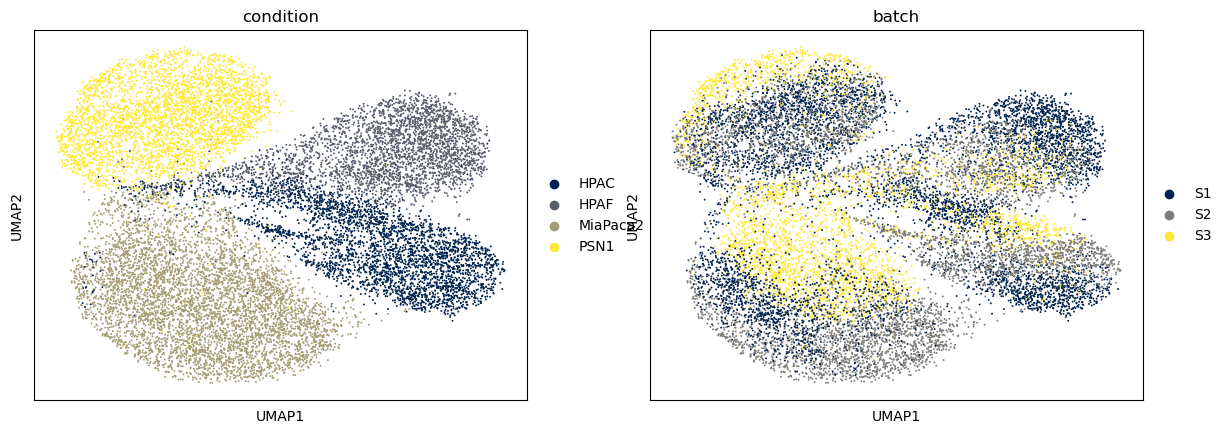

In [5]:
adata_bb = adata.copy()
sc.pp.pca(adata_bb)
sc.external.pp.bbknn(adata_bb)
sc.tl.umap(adata_bb, min_dist=0.5, spread=1.0, random_state=1, n_components=2)
sc.pl.umap(adata_bb, color=['condition', 'batch'], palette='cividis')

In [8]:
adata_imputed_2 = bm.bb_magic(
    adata, 
    t=2, 
    copy=True,
    random_state=1
)

Running MAGIC on 15685 cells and 911 genes.
Using precomputed graph and diffusion operator...
Calculating imputation...


/home/mklein/miniconda3/envs/dropout_env/lib/python3.10/site-packages/magic/magic.py:541: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  warnings.warn(


Calculated imputation in 4.62 seconds.


/home/mklein/miniconda3/envs/dropout_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mklein/miniconda3/envs/dropout_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


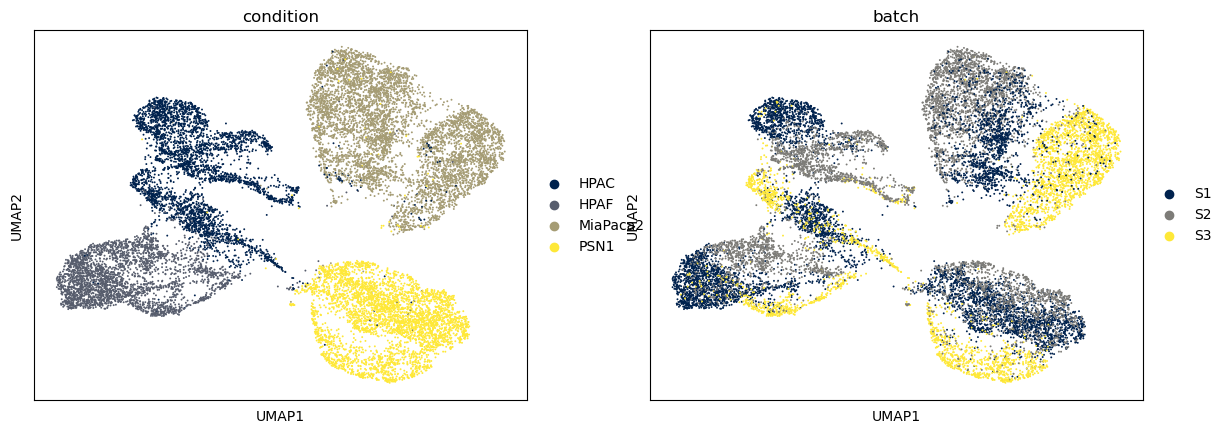

In [9]:
sc.pp.pca(adata_imputed_2)
sc.pp.neighbors(adata_imputed_2, n_neighbors=50, metric='cosine')
sc.tl.umap(adata_imputed_2, min_dist=0.5, spread=1.0, random_state=1, n_components=2)
sc.pl.umap(adata_imputed_2, color=['condition', 'batch'], palette='cividis')

In [16]:
adata_imputed_3 = bm.bb_magic(
    adata, 
    t=3, 
    copy=True,
    random_state=1
)

Running MAGIC on 15685 cells and 911 genes.
Using precomputed graph and diffusion operator...
Calculating imputation...


/home/mklein/miniconda3/envs/dropout_env/lib/python3.10/site-packages/magic/magic.py:541: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  warnings.warn(


Calculated imputation in 6.44 seconds.


/home/mklein/miniconda3/envs/dropout_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mklein/miniconda3/envs/dropout_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


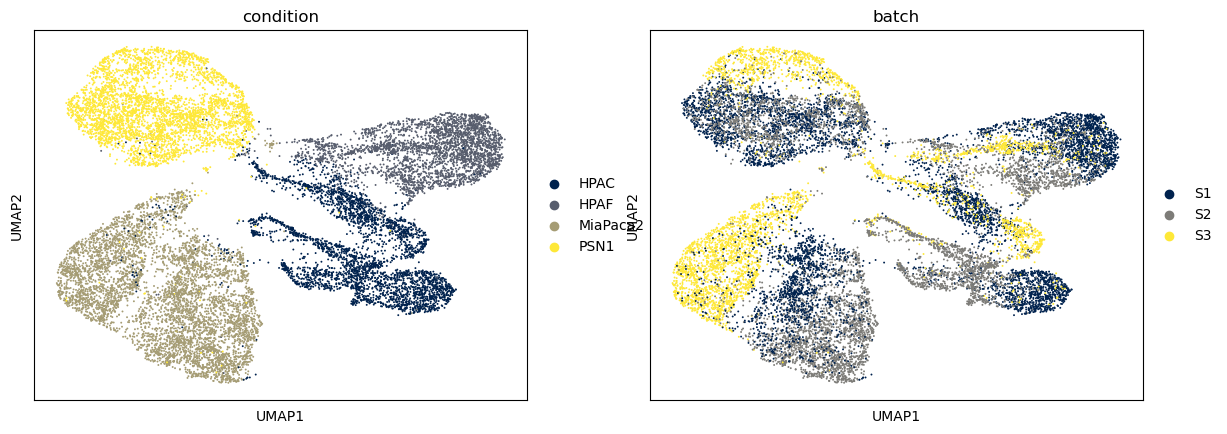

In [17]:
sc.pp.pca(adata_imputed_3)
sc.pp.neighbors(adata_imputed_3, n_neighbors=50, metric='cosine')
sc.tl.umap(adata_imputed_3, min_dist=0.5, spread=1.0, random_state=1, n_components=2)
sc.pl.umap(adata_imputed_3, color=['condition', 'batch'], palette='cividis')

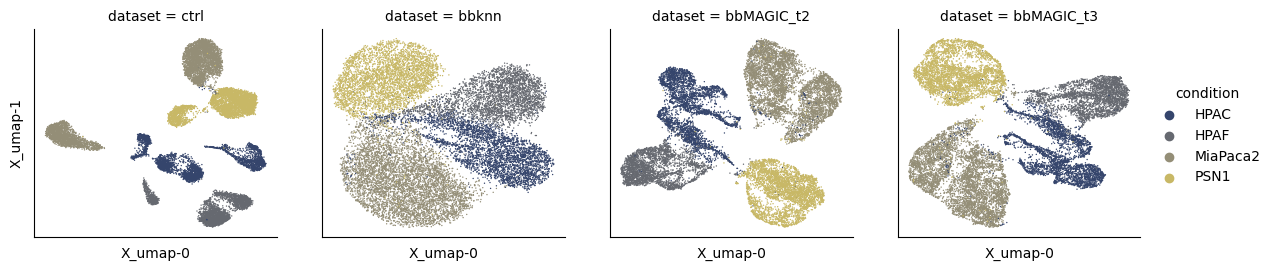

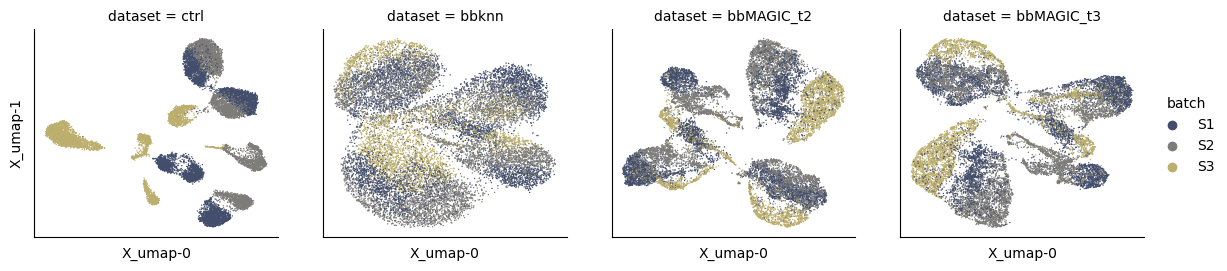

In [18]:
df_list = []
for key, adat in {'ctrl': adata, 'bbknn': adata_bb, 'bbMAGIC_t2': adata_imputed_2, 'bbMAGIC_t3': adata_imputed_3}.items():
    df = sc.get.obs_df(adat, keys=['batch', 'condition'], obsm_keys=[("X_umap", 0), ("X_umap", 1)])
    df['dataset'] = key
    df_list.append(df)

df = pd.concat(df_list)

import seaborn as sns
plot_cond = sns.relplot(df, hue='condition', col='dataset', x='X_umap-0', y='X_umap-1', 
    palette='cividis', s=1, height=3, linewidth=0, facet_kws={'sharex':False, 'sharey':False})
for ax in plot_cond.axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])
plot_bat = sns.relplot(df, hue='batch', col='dataset', x='X_umap-0', y='X_umap-1', 
    palette='cividis', s=1, height=3, linewidth=0, facet_kws={'sharex':False, 'sharey':False})
for ax in plot_bat.axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])